# load packages and modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import MangroveConservation.get_twitter_data1 as getTwitterdata
import MangroveConservation.clean_text1 as clean
import MangroveConservation.network_analysis as network
import MangroveConservation.sentiment_analysis1 as sentiment

help(getTwitterdata.get_data)

Help on function get_data in module MangroveConservation.get_twitter_data1:

get_data(SEARCH_QUERY, DEV_ENVIRONMENT_LABEL, API_SCOPE, API_KEY, API_SECRET_KEY, TO_DATE, FROM_DATE, FILENAME)
    get twitter data through twitter API from full archive search sand box and return all twitters in JSONL file
    based on 
     search term, 
     the geographic location of interest
     the time period of interest.
     and personal twitter account information.
    
     Reference: https://github.com/geduldig/TwitterAPI/tree/master/TwitterAPI
     Reference: https://developer.twitter.com/en/docs/tweets/search/overview



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gongmimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gongmimi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# pdoc,pytest and lint score

In [ ]:
#pdoc3
!export PATH=$PATH:~/.local/bin/; cd CMSE802/MangroveConservation;pdoc3 --force --html --output-dir ./docs MangroveConservation

In [3]:
#pytest
!export PYTHONPATH=</home/gongmimi/CMSE802/MangroveConservation/MangroveConservation>: $PYTHONPATH; pytest test/test_get_data.py

============================= test session starts ==============================
platform linux -- Python 3.7.3, pytest-5.2.2, py-1.8.0, pluggy-0.13.0
rootdir: /home/gongmimi/CMSE802/MangroveConservation
plugins: arraydiff-0.3, doctestplus-0.4.0, openfiles-0.4.0, remotedata-0.3.2
collected 0 items / 1 errors                                                   

==================================== ERRORS ====================================
____________________ ERROR collecting test/test_get_data.py ____________________
ImportError while importing test module '/home/gongmimi/CMSE802/MangroveConservation/test/test_get_data.py'.
Hint: make sure your test modules/packages have valid Python names.
Traceback:
test/test_get_data.py:4: in <module>
    import get_twitter_data1 as get_data
E   ModuleNotFoundError: No module named 'get_twitter_data1'
!!!!!!!!!!!!!!!!!!! Interrupted: 1 errors during collection !!!!!!!!!!!!!!!!!!!!
=============================== 1 error in 0.09s ===================

In [16]:
#linting
!pylint MangroveConservation.sentiment_analysis1

************* Module MangroveConservation.sentiment_analysis1
MangroveConservation/sentiment_analysis1.py:30:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:35:77: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:97:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:99:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:134:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:136:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:154:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:168:30: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:8:0: W0105: String statement has no effect (pointless-string-statement)
MangroveConservati

In [15]:
!export PATH=$PATH:~/.local/bin/; autopep8 MangroveConservation/sentiment_analaysis.py  > MangroveConservation/sentiment_analysis1.py


# collect twitter data


In [ ]:
###collect twitter data and save them into CSV
API_KEY = 'i2uWM8Fvt36ipy3pEXk5Cy7ue'
API_SECRET_KEY = 'FKZBP7QjykINzuAJPVaEsO5l106xd939lmNmXoWQhl0Arqhpzz'
DEV_ENVIRONMENT_LABEL = 'mangroveConservation'
API_SCOPE = 'fullarchive'  # 'fullarchive' for full archive, '30day' for last 31 days

SEARCH_QUERY = '-RT mangrove forest'
TO_DATE = '2019-06-19' # format YYYY-MM-DD HH:MM (hour and minutes optional)
FROM_DATE = '2019-01-01'  # format YYYY-MM-DD HH:MM (hour and minutes optional)
FILENAME = 'twitter_premium_api_demo1.jsonl'  # Where the Tweets should be saved
csvfile = 'mangrove1.csv'

#getTwitterdata.get_data(SEARCH_QUERY,DEV_ENVIRONMENT_LABEL,API_SCOPE,API_KEY,API_SECRET_KEY,TO_DATE,FROM_DATE,FILENAME)

#tweets = getTwitterdata.loadjsonl(FILENAME)

#getTwitterdata.create_csv(tweets,csvfile)

# exploratory analysis

## collect the most fewquent words/phrases and graph wordcloud map

In [59]:
tweets = clean.ImportTweet("mangrove1.csv")
tweets.head()

,time,follower_count,id,name,user_description,tweet,user_joined,user_location
0,2019-12-30 16:11:32+00:00,382,1211756730616561670,Nach not Notch,i like food,I might regret this in more than one way For t...,2011,"Los Angeles, CA"
1,2019-12-30 15:11:45+00:00,19259,1211741686612709376,NAIDU,Be Don t Try To Become,India State of Forest Report ISFR2019 Mangrove...,2012,Hyderabad Telangana India 🇮🇳
2,2019-12-30 13:01:01+00:00,363,1211708784902623232,Shwetal Shah,Technical Adviser Dept of Climate Change Gujar...,Government of India released Forest report 201...,2011,India
3,2019-12-30 12:40:59+00:00,0,1211703743907008513,vinay shreshtha,,JOURNEY ABOUT TO START FOR THE MANGROVE FOREST,2010,"पश्चिम बंगाल, भारत"
4,2019-12-30 12:24:12+00:00,0,1211699521865965568,vinay shreshtha,,ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST ODISHA,2010,"पश्चिम बंगाल, भारत"


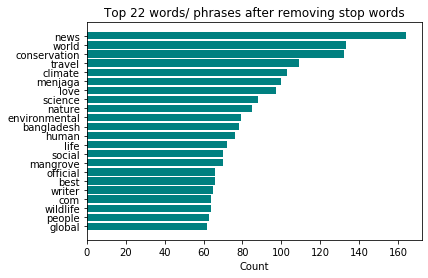

In [55]:
sentiment.PlotTopWords(tweets["user_description"],22,1,5)

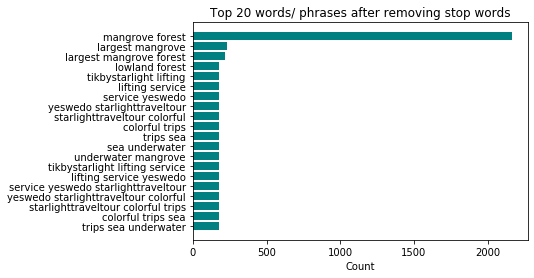

In [105]:
sentiment.PlotTopWords(tweets["tweet"],20,2,4)

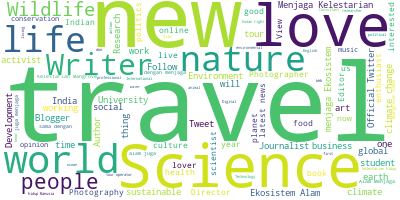

In [62]:
sentiment.PlotWordCloud(tweets['user_description'])

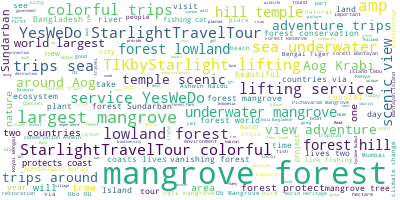

In [63]:
sentiment.PlotWordCloud(tweets['tweet'])

# sentiment analysis

In [71]:
tweets["sentiment"]=sentiment.Sentiment(tweets["tweet"])
tweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,time,follower_count,id,name,user_description,tweet,user_joined,user_location,sentiment
0,2019-12-30 16:11:32+00:00,382,1211756730616561670,Nach not Notch,i like food,I might regret this in more than one way For t...,2011,"Los Angeles, CA",Positive
1,2019-12-30 15:11:45+00:00,19259,1211741686612709376,NAIDU,Be Don t Try To Become,India State of Forest Report ISFR2019 Mangrove...,2012,Hyderabad Telangana India 🇮🇳,Neutral
2,2019-12-30 13:01:01+00:00,363,1211708784902623232,Shwetal Shah,Technical Adviser Dept of Climate Change Gujar...,Government of India released Forest report 201...,2011,India,Positive
3,2019-12-30 12:40:59+00:00,0,1211703743907008513,vinay shreshtha,,JOURNEY ABOUT TO START FOR THE MANGROVE FOREST,2010,"पश्चिम बंगाल, भारत",Neutral
4,2019-12-30 12:24:12+00:00,0,1211699521865965568,vinay shreshtha,,ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST ODISHA,2010,"पश्चिम बंगाल, भारत",Neutral


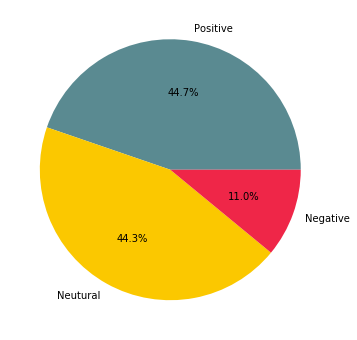

In [73]:
sentiment.PlotSentiment(tweets["sentiment"])

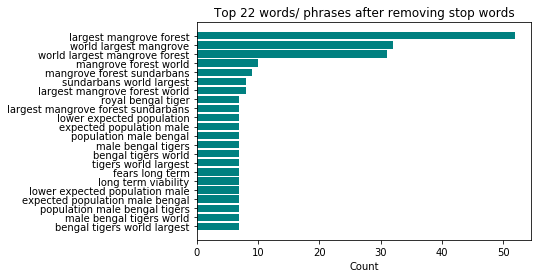

In [86]:
negative = tweets[tweets['sentiment']=='Negative']['tweet']
sentiment.PlotTopWords(negative,22,3,5)

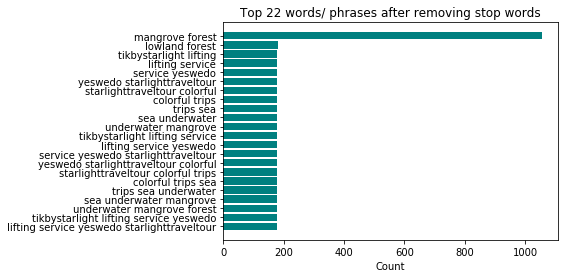

In [96]:
positive = tweets[tweets['sentiment']=='Positive']['tweet']
sentiment.PlotTopWords(positive,22,2,4)

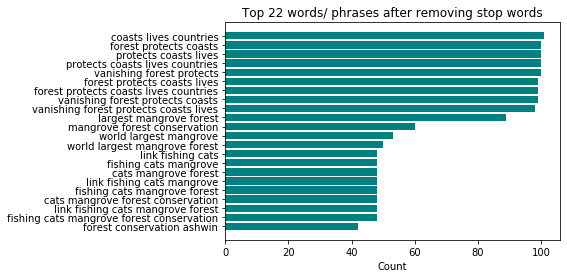

In [94]:
neutral = tweets[tweets['sentiment']=='Neutral']['tweet']
sentiment.PlotTopWords(neutral,22,3,5)

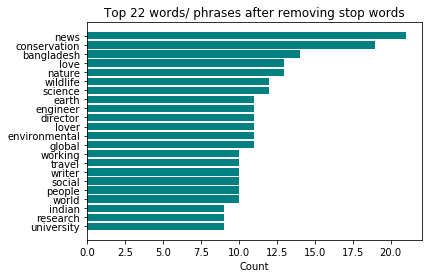

In [100]:
neg_user = tweets[tweets['sentiment']=='Negative']['user_description']
sentiment.PlotTopWords(neg_user,22,1,5)

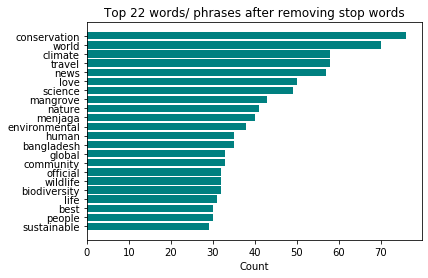

In [101]:
pos_user = tweets[tweets['sentiment']=='Positive']['user_description']
sentiment.PlotTopWords(pos_user,22,1,5)

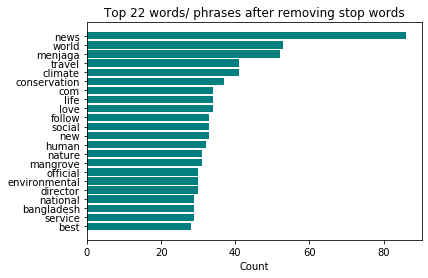

In [102]:
neu_user = tweets[tweets['sentiment']=='Neutral']['user_description']
sentiment.PlotTopWords(neu_user,22,1,5)

# Data visualization

In [78]:
import geopy
#import geopandas
item = tweets['user_location']
print(item)


0                                    Los Angeles, CA
1                       Hyderabad Telangana India 🇮🇳
2                                              India
3                                 पश्चिम बंगाल, भारत
4                                 पश्चिम बंगाल, भारत
5                                                NaN
6                                                NaN
7                                             Mumbai
8                                          New Delhi
9                                       New York, NY
10                                               NaN
11                                               NaN
12                                            Odisha
13                                      G.Bhavavaram
14                               Bhubaneshwar, India
15                                  New Delhi, India
16                                  New Delhi, India
17                            New Delhi / Chandigarh
18                                  New Delhi,

In [ ]:
locator = Nominatim(user_agent=”myGeocoder”)
location = locator.geocode(item)
    

# Network analysis

In [1]:
# name of the file with the Tweet objects

GEXF_FILE = 'demo_network.gexf'
network.create_gexf(tweets, GEXF_FILE)


NameError: name 'network' is not defined